In [6]:
import pandas as pd
import numpy as np
import glob
import os
import scanpy as sc
sc.settings.verbosity = 3  

----------- high sensitivity -----------
AnnData object with n_obs × n_vars = 20356 × 19393
    obs: 'n_genes'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand'
Running Scrublet
filtered out 14318 genes that are detected in less than 3 cells
filtered out 12908 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...


/home/cstansbu/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


    using data matrix X directly
Automatically set threshold at doublet score = 0.28
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.7%
    Scrublet finished (0:00:53)


/home/cstansbu/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_qc.py:431: RuntimeWarning: invalid value encountered in divide
  return values / sums[:, None]


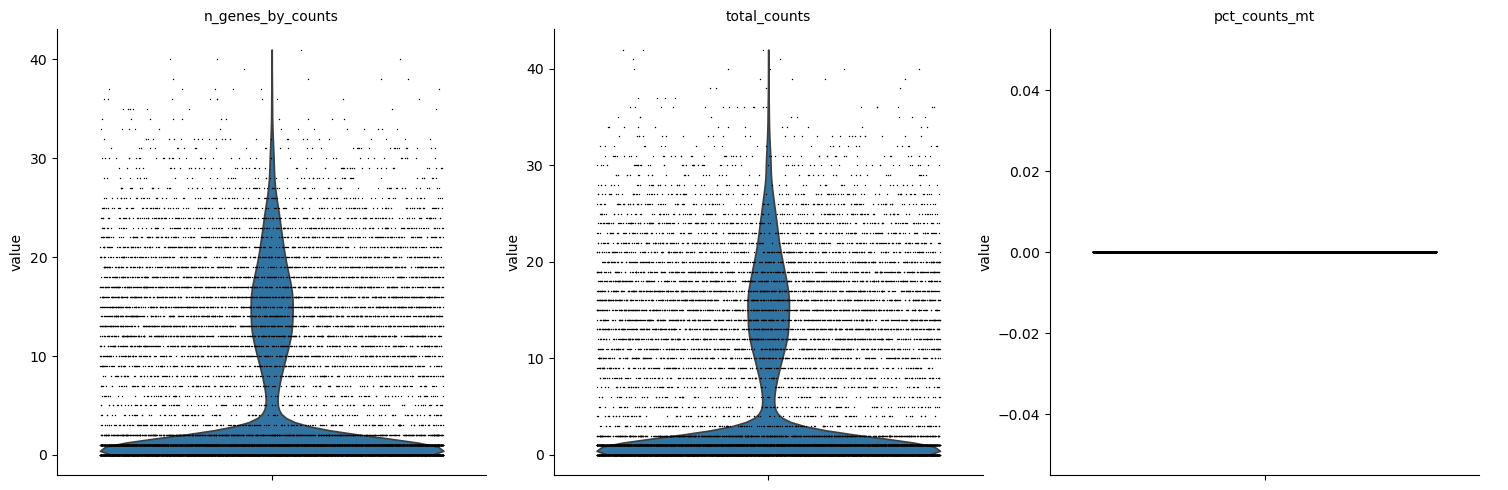

----------- low sensitivity -----------
AnnData object with n_obs × n_vars = 9200 × 19393
    obs: 'n_genes'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand'
Running Scrublet
filtered out 14418 genes that are detected in less than 3 cells
filtered out 1731 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly


/home/cstansbu/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


Automatically set threshold at doublet score = 0.08
Detected doublet rate = 20.6%
Estimated detectable doublet fraction = 47.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 43.1%
    Scrublet finished (0:00:19)


/home/cstansbu/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_qc.py:431: RuntimeWarning: invalid value encountered in divide
  return values / sums[:, None]


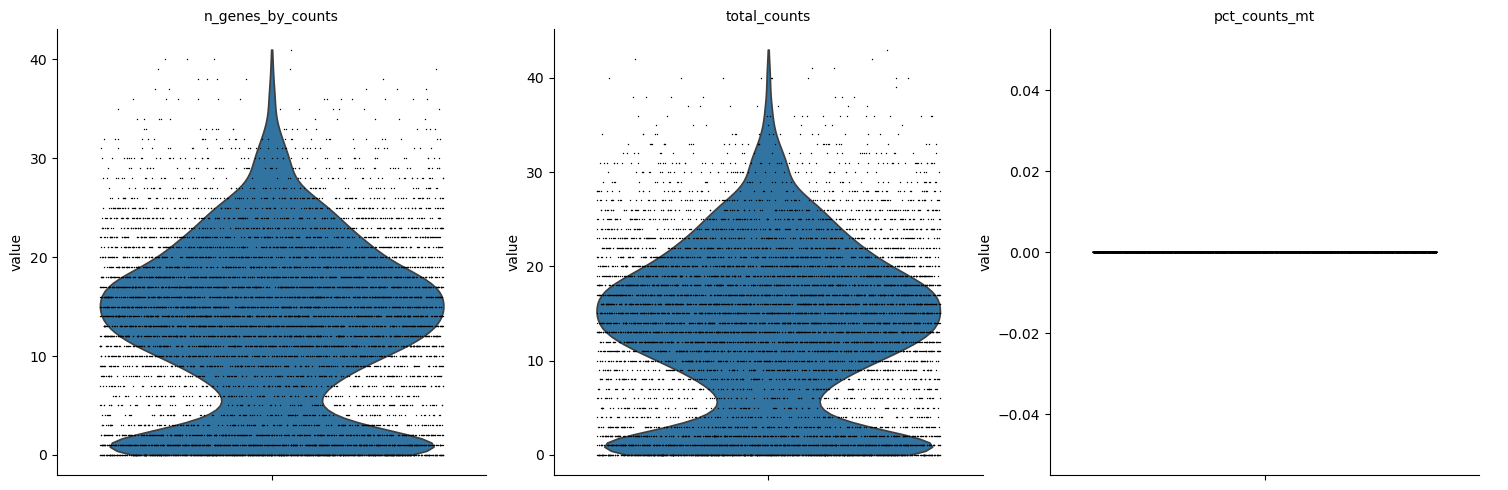

In [8]:
file_paths = {
    'high' : "/scratch/indikar_root/indikar1/cstansbu/sc_fib_test_high_sensitivity/scanpy/raw.anndata.h5ad",
    'low' : "/scratch/indikar_root/indikar1/cstansbu/sc_fib_test_low_sensitivity/scanpy/raw.anndata.h5ad",
}

data = {}
for k, fpath in file_paths.items():
    adata = sc.read_h5ad(fpath)
    print(f"----------- {k} sensitivity -----------")
    print(adata)
    
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
    adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

    sc.pp.scrublet(
        adata
    )

    sc.pp.calculate_qc_metrics(
        adata, 
        qc_vars=["mt", "ribo", "hb"], 
        inplace=True, 
        log1p=True
    )

    sc.pl.violin(
        adata,
        ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
        jitter=0.4,
        multi_panel=True,
    )

    